# Databases Lab


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image  # can imbedd image in html using: Image("filename.png)

### Abstract 

We conduct an experiment using databses to perform a simple cross-match of three separate data files of galaxy/qso properties, based first on their id number, and then their position. This excercise is important because it is an extremely common in astronomy, which has become a more data driven field in recent years, especially when dealing with large data sets with elements that need to be matched or compared based on some criteria, in a reasonably short amount of time. We used the locally installed MySQL database on Angell Hall computers. We find that the cross match from using the id number and position are both the same, except for an extra one in the id match. This is because one of the id numbers is incorrectly assigned, giving an extra match, and thus, both outputs are equivalent.

### Introduction 

Structured database queries are extremely usefulel for reading/searching through large data-sets. In astronomy, the increasing precision and richness of sky surveys are placing enormous emphasis on large databases, of which reading through may take days. Software engineering and statistics are thus becoming as integral  as physics and mathematics. In order to deal with these massive databases, clever search algorithms and techniques are needed to avoid taking an absurd amount of time. In this experiment, we hope to demonstrate the massive time benefits of using structured database queries to read through large amounts of data, compared to a typical, vanilla programming approach that may involve reading data bit by bit.



### Theory 

###### The future of databases in astronomy research. 2 paragraphs - 5 points.  Discuss at least two future projects which you think will take advantage of using database type research given the size of the datasets that will be collected (perhaps use one ground-based telescope experiment and one space-based telescope experiment which will collect very large datasets of common type).  

The Large Synoptic Survey Telescope (LSST) is an  8.4-meter telescope currently under construction, that will image the entire sky once every 3 days over 10 years, for a total of 825 revisits. The telscope will have about 10 mili-arcsecond astrometry. After 10 years of imaging, the r band magnitude limit will be 27.5 magnitudes. This survey will involve huge amounts of imaging data - about 15 TB per night. In addition, there is no proprietary period on the data, and anyone can use it for research purposes immediately. Some of the scientific goals of the LSST include detecting dark energy/matter with weak lensing, mapping the Milky Way, and detecting events such as supernovae. Thus, database queries will be very important in combing through the massive amounts of imaging data that the LSST will survey, which would otherwise take many days using a bare minimum search approach. There are many specific uses that can be explored with the broad survey the LSST will produce, meaning quick searches for objects/areas of the sky will be imperative.


Another future project is the Wide-Field Infrared Survey Telescope (WFIRST), a space based telescope planned to be lalunched in the mid 2020s. WFIRST combines the aspects of the Sloan Digital Sky survey and the hubble space telescope, and carries two primary instruments: The Wide-Field Instrument is a 288-megapixel multi-band near-infrared camera. It has same imaging precision as the HST, but with roughly a factor of 100 larger field of view. The Coronagraphic Instrument small field of view camera/spectrometer coering visible and near-infrared light. Over it's planned six year mission lieftime, WFIRST will measure light from ~one billion galaxies, and ~2,600 exoplanets. These data will be used to study questions in fields of dark energy, exoplanets, and infrared astrophysics. While WFIRST will not be as comprehensive or data heavy as LSST, it will still have large amounts of sky and individual galaxy/exoplanet systems that need to be read through, making databases very important here as well.

###### The pros and cons of using SQL versus a traditional programming approach. 1 paragraph and one graph - 5 points.  

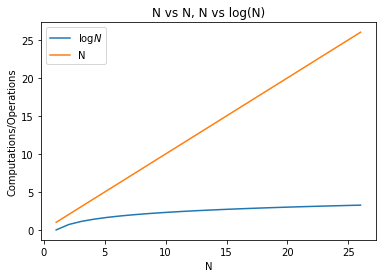

In [63]:
N = np.linspace(1,26,25)
logN = np.log(N)
plt.plot(N,logN,label="$\log{N}$")
plt.plot(N,N,label="N")
plt.xlabel("N")
plt.ylabel("Computations/Operations")
plt.title("N vs N, N vs log(N)")
plt.legend()
plt.show()

##### Use Python to create your own graph:  a graph of N versus log(N) as a function of N (x=N versus y=log(N)) from N = 1 to N < 50.  It should resemble a graph that was shown in the class notes.  Also EXPLAIN why this is relevant to database searches and use of a SQL versus a traditional programming approach. 

This plot shows the general worst case scenerio number of computations when performing a very basic database search (N vs N), for instance reading through each bit of data until you find what you are looking for, as well as a typical number of database query search operations (N vs $\log{N}$). Using a clever search algorithm, such as storing database in a table, and finding the medians of half of the table rows above or below the value you're looking for iteratively until it is found, can be proven to perform as $\log{N}$. Thus we see that the number of operations is significnatly less. This dichotomy is exacerbated as N increases, as seen in the plot above. Therefor, for extremely large databases, using a $\log{N}$ approach, as in SQL, for searching through the data will be significantly faster as there are significantly less computations needed. 

### Experiment and Methodology 

We first create a database, which we named birds. Using this database, we then created a table, assigning data types for the first column as an integer auto-increment id number, the name and scientific name columns as strings, and the number of sighitngs as integer, setting the primary key of the table to be the id number. We then load the birds.csv data into the table from the /tmp folder, specifying the columns to be termianted by the commas in the brids.csv file, and populating the name, sciname, s_sight, w_sight column of the table. 

Below we show ten example rows from this table we created. We see that from this section of the tutorial, we convert data into SQL database tables.

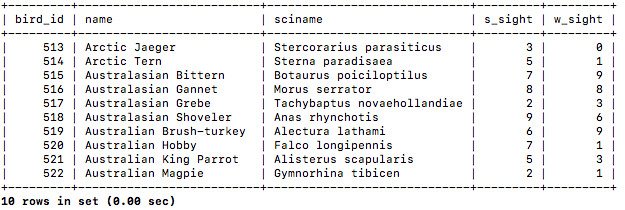

In [58]:
Image("bird.png")

We then created a new database named grades. Using this database, we again created a table, this time with the columns - student-id as integer and mark as 5 charater limit string, setting the student-id to be the primary key. We then use a loadgrades.sql script, rather than inputting commands into the command line, to perform a basic task of inputting data into the table. We use the script just by calling it from the command line with SOURCE ~/path. The script creates and uses a dataase, creates a table outlined above, and inputs one row. 

This table is shown below. From this section of the tutorial, we see that we can execute sql scripts, rather than inputting individual commands into the command line. 

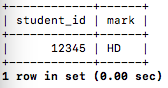

In [59]:
Image("student.png")

We created a database named bank, and used it to execute an sql script, LearningSQLExample.sql, which creates eleven data filled tables. We then perform several basic SQL queries, such as listing the first and last names from the employee table, which we use commands SELECT [column name] FROM [table];, and also finding all employees with the last name Smith, which we include a WHERE lname='Smith'; to filter. We also perform a query to filter employess  based on a range of their starting dates, shown below along with the query script. From this section fo tutorial, we see how to perform queries, and filter and search through data that we placed in tables.

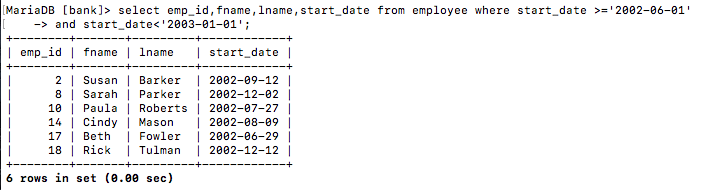

In [60]:
Image("employee.png")

We then perform various other queries, such as NULL filters, and joining tables. We perform inner joins of two tables, then perform inner joins on three tables, We then perform outer joins, which are different from inner joins in that they output all rows, rather than the ones that match the join parameters. 

Below is the SQL script which describes the process of joining the three data files galaxies_photometry.csv, galaxies_spectroscopy.csv, and qsos_spectroscopy.csv.

~~~ SQL 
CREATE DATABASE lab9;
USE lab9;

CREATE TABLE galphot (objid BIGINT, ra FLOAT, decl FLOAT, petroMag_r FLOAT, PRIMARY KEY (objid));

create table galspec (objid BIGINT, ra FLOAT, decl FLOAT, z FLOAT, PRIMARY KEY (objid));

create table qsospec (objid BIGINT, ra FLOAT, decl FLOAT, z FLOAT, PRIMARY KEY (objid));


load data infile "/tmp/Galaxies_photometry.csv" into table galphot 
	fields terminated by "," 
	ignore 1 lines 
	(objid,ra,decl,petroMag_r);

load data infile "/tmp/Galaxies_spectroscopy.csv" into table galspec 
	fields terminated by "," 
	ignore 1 lines 
	(objid,ra,decl,z);

load data infile "/tmp/QSOs_spectroscopy.csv" into table qsospec 
	fields terminated by "," 
	ignore 1 lines 
	(objid,ra,decl,z);

select galphot.objid,galphot.ra,galphot.decl,galphot.petroMag_r,galspec.z from galphot
	join galspec on galphot.objid=galspec.objid
	join qsospec on galphot.objid=qsospec.objid
	into outfile '/tmp/objid.txt';

select galphot.objid,galphot.ra,galphot.decl,galphot.petroMag_r,galspec.z  from galphot, galspec, qsospec 
	where ABS(galphot.ra - galspec.ra) <= 0.0001389 and ABS(galphot.decl - galspec.decl) <= 0.0001389 
	and ABS(galphot.ra - qsospec.ra) <= 0.0001389 and ABS(galphot.decl - qsospec.decl) <= 0.0001389 
	into outfile '/tmp/pos.txt';


~~~

The script above outlines the method of joining the three tables, two of which have id numbers, position, photometric magnitude, and redshift, of galaxies, and the third having id number, position, and redshift of QSOs.

We first create and use a database named "lab9", in which we input the three data files in tables, defining three tables named galphot, galspec, and qsospec, with BIGINT and float data types for the columns, setting the primary key to be objid.

We then perform two different joins, one based on id number, and one on the position. For the id join, we simply selected all the columns from the galphot table, which will be displayed in the output/outfile txt file, and joined galspec and qsospec to galhpot for objid, and printed the join to an outfile objid.txt. For the position join, we used a 0.5 arcsecond threshold (which we used as it is the approximate astrometry of 2MASS) to determine equivalent positions. Thus, we set filters on the three tables at once, setting the absolute value of the RA and DEC to be less than 0.0001389 degrees. 

The search based on id was faster than the one based on position by aabout several seconds. This is beacuse the position based search had to calculate the difference between the positions for all rows, adding to the number of computations. Because one of the obj_id is wrongly identified in one of the data files, we expect an extra row in the join output of the id based join. We see that we do have 22 rows for the id join, and 21 rows for the position join, meaning, in this specific case, both joins were equally accurate. Theoretically, however, the id join should be more accurate thatn the position join, as the astrometry of telescopes are never 100 percent accurate, and a position threshold may include extraneous objects with coincidental positions, or exclude objects that have a high positional difference due to astrometric inacuracy of the telecope.

The join outputs are shown below.

id join output:


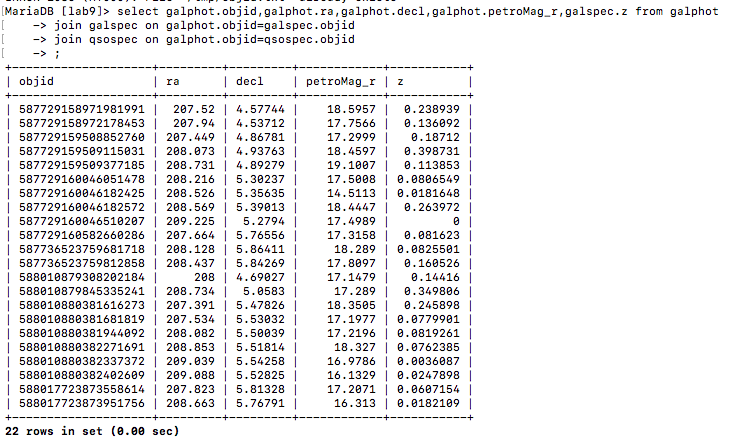

In [65]:
print("id join output:")
Image("id.png")

position join output


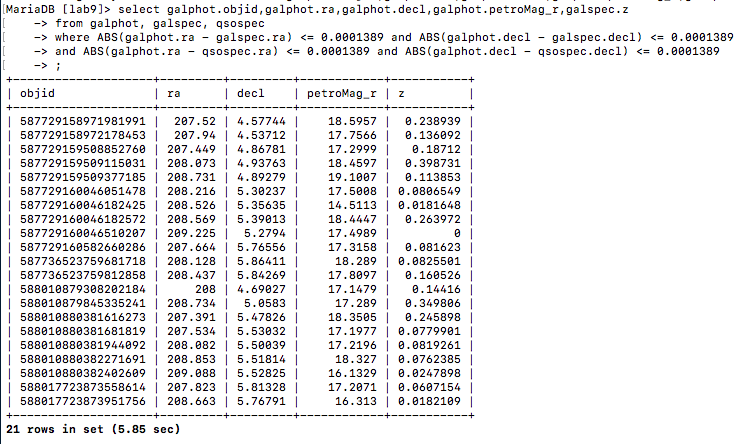

In [66]:
print("position join output")
Image("pos.png")

In [67]:
objid_id,ra_id,dec_id,mag_id,z_id = np.loadtxt("objid.txt",unpack=True)
objid_p,ra_p,dec_p,mag_p,z_p = np.loadtxt("pos.txt",unpack=True)

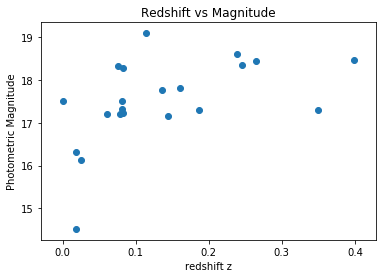

In [68]:
plt.scatter(z_p,mag_p)
plt.xlabel("redshift z")
plt.ylabel("Photometric Magnitude")
plt.title("Redshift vs Magnitude")
plt.show()

The plot above shows the redshift z of the galaxies/QSOs versus their photometric magnitude. By inspection, we observe a slight apparent logarithmic curve of increasing magnitude with redshift. This would make sense, as greater redshifts indicate larger distance, and apparent magnitude scales with $\log{d}$, where $d$ is distance. Thus, we would expect to see a general logarithmic curve shap, with large intrinsic scatter from differing luminosities of the galaxies, which is indeed what we generally observe above.

### Summary 

In this experiment, we used MySQL database queries to perform basic cross match between large data files. We first explored basic properties and techniques of MySQL, as was outlined in the tutorial. We used several of these techniques to perform queries that match galaxies and QSOs by id number and position.  We created three tables in a created MySQL database, which we joined using objid, and position parameters, set as the difference of ra and dec to both be below 0.5 arcseconds. The outputs of the joins have 21 (position) and 22 (id) rows. We then plotted redshift vs magnitude of the matched galaxies and qso from the join. 


### Conclusions 

The results of this lab allow us to conclude the speed and usefulness of strucured database queries in searching through large data sets. We see that we can peform a search of matching galaxies and QSOs in very large files of galaxy and QSo properties in a matter of fractions of a second. Even when performing a search involving many additional computations, such as filtering based on the difference of positions, we see an output can be formed in seconds. We also see the importance of scripts, which can be saved and modified later for other different or larger data sets. 